In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
#load the dataset
data= pd.read_csv('creditcard.csv')

In [29]:
#display first few  
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
#seperate features and target variables
X= data.drop(columns=['Time','Class'])
Y= data['Class']

In [33]:
#scale the data
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)
X_train= X_scaled[Y==0]

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [35]:
def create_autoencoder(input_shape):
    model= models.Sequential()
    model.add(layers.Input(shape= input_shape))
    model.add(layers.Dense(17, activation='relu'))
    model.add(layers.Dense(4,activation='relu'))
    model.add(layers.Dense(17,activation='relu'))
    model.add(layers.Dense(input_shape[0], activation='sigmoid'))
    return model

In [37]:
#create autoencoder
autoencoder = create_autoencoder((X_train.shape[1],))
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
#train encoder
history= autoencoder.fit(X_train, X_train, epochs=50,batch_size=256,validation_split=0.2,shuffle=True)

Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0163 - val_loss: 0.8872
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8683 - val_loss: 0.8646
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8520 - val_loss: 0.8551
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8333 - val_loss: 0.8475
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8319 - val_loss: 0.8450
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8285 - val_loss: 0.8408
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8237 - val_loss: 0.8378
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8207 - val_loss: 0.8349
Epoch 9/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8273 - val_loss: 0.8326
Epoch 10/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8173 - val_loss: 0.8306
Epoch 11/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8318 - val_loss: 0.8287
Epoch 12/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [41]:
x_scaled_all= scaler.transform(X)
reconstructions= autoencoder.predict(x_scaled_all)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [42]:
#calc the reconstruction error
mse= np.mean(np.power(x_scaled_all- reconstructions,2),axis=1)
#set threshold
threshold = np.percentile(mse,95)
#identify anomalies
anomalies=mse > threshold
print(f'Number of anomalies detected: {np.sum(anomalies)}')

Number of anomalies detected: 14241


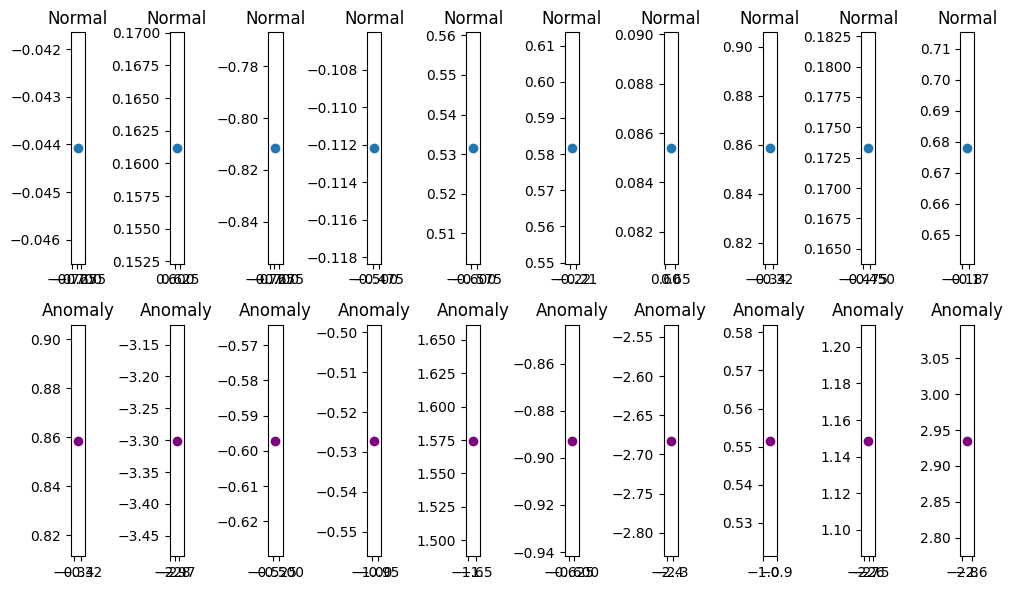

In [44]:
normal_indices= np.where(Y==0)[0][:10]
anomalous_indices= np.where(anomalies)[0][:10]

plt.figure(figsize=(10,6))
for i , idx in enumerate(normal_indices):
    plt.subplot(2,10,i+1)
    plt.scatter(x_scaled_all[idx,0],x_scaled_all[idx,1])
    plt.title('Normal')

for i , idx in enumerate(anomalous_indices):
    plt.subplot(2,10,i+11)
    plt.scatter(x_scaled_all[idx,0],x_scaled_all[idx,1],color='purple')
    plt.title('Anomaly')

plt.tight_layout()
plt.show()

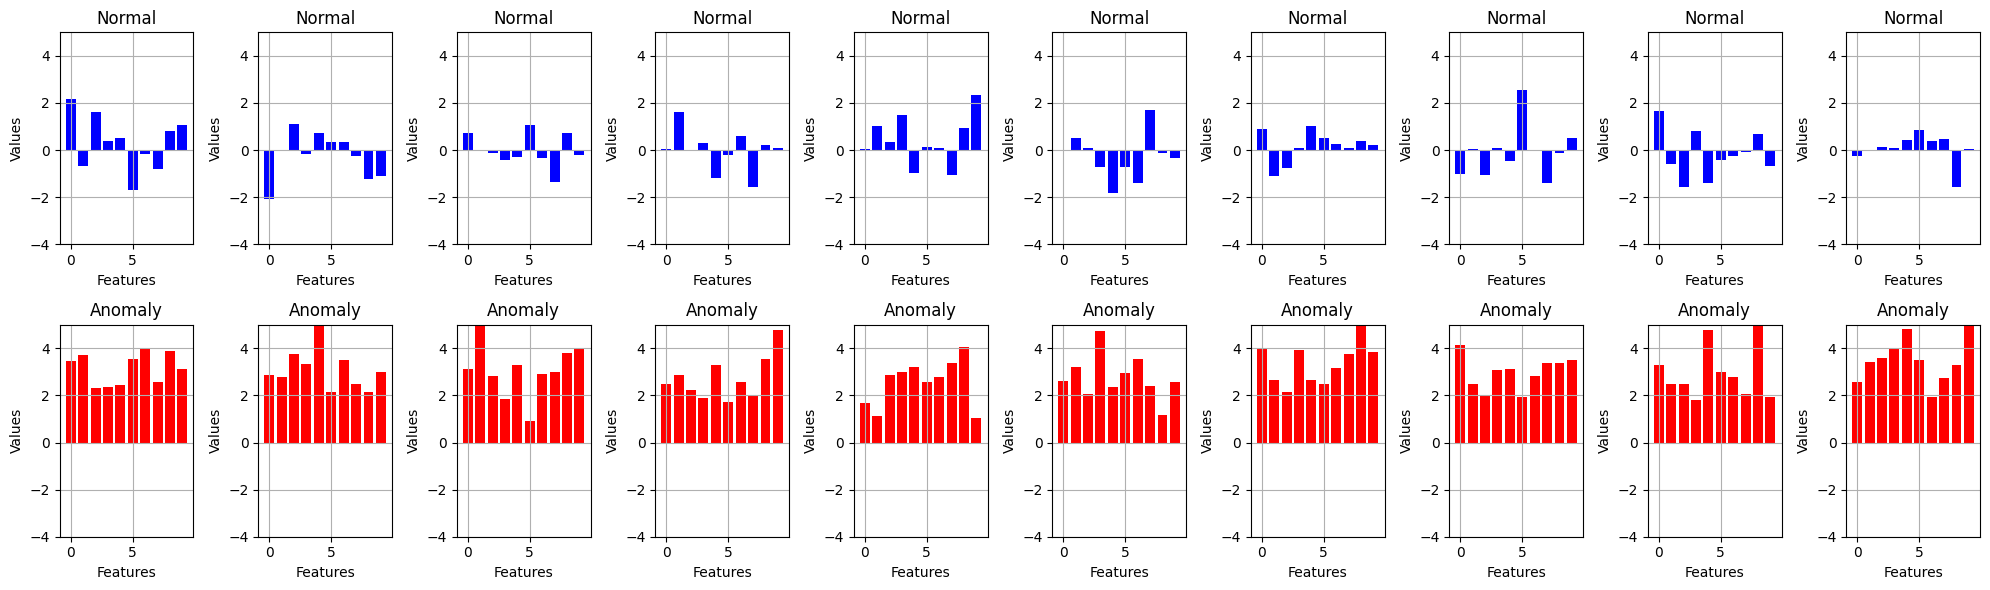

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
# Assuming 'normal_values' and 'anomaly_values' are numpy arrays of shape (n_samples, n_features)
normal_values = np.random.normal(size=(10, 10))  # Replace with actual normal values
anomaly_values = np.random.normal(loc=3, size=(10, 10))  # Replace with actual anomaly values

# Create a figure and axes
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

# Plot normal values
for i in range(10):
    axes[0, i].bar(range(normal_values.shape[1]), normal_values[i], color='blue')
    axes[0, i].set_title('Normal')
    axes[0, i].set_ylim([-4, 5])  # Adjust y-axis limit for better visibility
    axes[0, i].grid()

# Plot anomaly values
for i in range(10):
    axes[1, i].bar(range(anomaly_values.shape[1]), anomaly_values[i], color='red')
    axes[1, i].set_title('Anomaly')
    axes[1, i].set_ylim([-4, 5])  # Adjust y-axis limit for better visibility
    axes[1, i].grid()

# Add labels
for ax in axes.flatten():
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()